In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import seaborn as sns
from scipy import stats as st
from bioinfokit.analys import stat
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dataset = pd.read_csv (r'/filepath.csv')
#print (dataset)
dataset.tail()

,API,Formula_API,MW_API,LogP_API,AlogP_API,HBA_API,HBD_API,TPSA_API,AMR_API,nRB_API,...,Acidicpka4_Co,Basicpka1_Co,Basicpka2_Co,Basicpka3_Co,Basicpka4_Co,MeltingP_Co,Formation_Binary,Coformer,Formula_Co,Formation
537,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,230.0,1,4-(bromomethyl)benzoic acid,C₈H₇BrO₂,CC
538,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,214.5,1,4-hydroxybenzoic acid,C₇H₆O₃,CC
539,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,158.0,1,2-hydroxybenzoic acid/ Salicyclic acid,C₇H₆O₃,CC
540,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,2.69,0.0,0.0,0,188.5,1,4-aminobenzoic acid,C₇H₇NO₂,CC
541,Voriconazole,C₁₆H₁₄F₃N₅O,349.316,-1.176,-2.122,6,1,72.91,90.0,5,...,0.0,0.00,0.0,0.0,0,141.0,1,3-nitrobenzoic acid,C₇H₅NO₄,CC


In [3]:
X = dataset[['MW_API','LogP_API','AlogP_API','HBA_API','HBD_API',
             
    'TPSA_API','AMR_API','nRB_API','nAtom_API','nAcidicGroup_API',
             
    'RC_API', 'nRigidB_API', 'nAromaticRings_API', 'nHB_API',
             
    'E_API', 'Eaq_API', 'relE_API', 'relEaq_API', 'EHOMO_API',
             
    'ELUMO_API', 'Dipole_API', 'SolvationE_API', 'Solubility_API',
             
    'Acidicpka1_API', 'Acidicpka2_API', 'Acidicpka3_API', 'Acidicpka4_API',
             
    'Basicpka1_API', 'Basicpka2_API', 'Basicpka3_API', 'Basicpka4_API',
             
    'MW_Co','LogP_Co', 'AlogP_Co', 'HBA_Co','HBD_Co', 'TPSA_Co',
             
    'AMR_Co', 'nRB_Co', 'nAtom_Co', 'nAcidicGroup_Co', 'RC_Co',
             
    'nRigidB_Co', 'nAromaticRing_Co', 'nHB_Co', 'E_Co', 'Eaq_Co',
             
    'relE_Co', 'relEaq_Co', 'EHOMO_Co', 'ELUMO_Co', 'Dipole_Co',
             
    'SolvationE_Co', 'Solubility_Co', 'Acidicpka1_Co', 'Acidicpka2_Co',
             
    'Acidicpka3_Co', 'Acidicpka4_Co', 'Basicpka1_Co', 'Basicpka2_Co', 'Basicpka3_Co', 'Basicpka4_Co']] 

Y = dataset['Formation_Binary']

In [4]:
from sklearn.preprocessing import StandardScaler 
X = StandardScaler().fit_transform(X)            #standardize data 

In [5]:
#machine learning algorithm 
from sklearn.model_selection import train_test_split

In [6]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [7]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
log_reg = LogisticRegression()                 #make object of logistic regression class
Model = log_reg.fit(X_train, Y_train)

In [10]:
log_reg.score(X_test,Y_test)   #Regression Score For Testing

0.7981651376146789

In [11]:
model = LogisticRegression()

In [12]:
log_reg.score(X,Y)             #Regression Score For training 

0.8081180811808119

In [13]:
Y_Pred = Model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

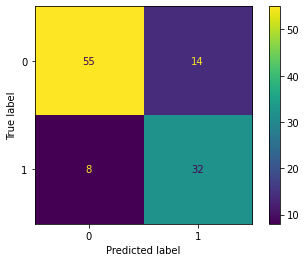

In [15]:
confusion_matrix(Y_test, Y_Pred)
cm = confusion_matrix(Y_test, Y_Pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#plt.savefig('condusion_matrix.png', dpi=600)

In [16]:
# Call the coeffcicients from the model we trained
features_values = Model.coef_


In [17]:
features_values

array([[-1.15683221e-01, -1.38211684e-01, -2.71980947e-01,
        -2.16599398e-01, -4.10772376e-01,  3.98179480e-01,
        -4.72086368e-01,  1.05456024e-01,  1.06283264e-01,
        -2.35735872e-02,  5.42507576e-01, -3.65764870e-01,
         7.13287318e-01, -3.01572663e-01, -5.53200645e-01,
         4.59052846e-01,  0.00000000e+00,  0.00000000e+00,
        -2.58170977e-01,  7.97246893e-03,  5.74434684e-02,
        -1.38405622e-01, -3.25616487e-02,  1.50279652e-01,
         1.78653174e-01,  6.64924779e-03, -7.65775297e-02,
        -1.23247830e+00, -6.72496028e-02,  7.12150099e-01,
         7.65775297e-02, -1.12181543e-01,  1.56019563e-02,
        -2.19835395e-02,  3.97580000e-01, -2.69685079e-01,
         2.99217628e-02,  1.70566598e-01,  1.52538033e-01,
        -3.74896884e-01,  3.29218907e-01,  6.99345941e-01,
        -5.22140684e-02,  2.24374722e-01,  1.48199055e-01,
         4.64667841e-01, -4.00277113e-01,  0.00000000e+00,
         0.00000000e+00,  2.51443560e-01, -3.45504470e-0

In [18]:
features = ['MW_API','LogP_API','AlogP_API','HBA_API','HBD_API',
             
    'TPSA_API','AMR_API','nRB_API','nAtom_API','nAcidicGroups_API',
             
    'RC_API', 'nRigidB_API', 'nAromatic_rings_API', 'nHB_API',
             
    'E_API', 'Eaq_API', 'relE _API', 'relEaq_API', 'EHOMO_API',
             
    'ELUMO_API', 'Dipole_API', 'SolvationE_API', 'Solubility_API',
             
    'Acidicpka1_API', 'Acidicpka2_API', 'Acidicpka3_API', 'Acidicpka4_API',
             
    'Basicpka1_API', 'Basicpka2_API', 'Basicpka3_API', 'Basicpka4_API',
             
             
    'MW_Co','LogP_Co', 'AlogP_Co', 'HBA_Co','HBD_Co', 'TPSA_Co',
             
    'AMR_Co', 'nRB_Co', 'nAtom_Co', 'nAcidicGroups_Co', 'RC_Co',
             
    'nRigidB_Co', 'nAromaticRings_Co', 'nHB_Co', 'E_Co', 'Eaq_Co',
             
    'relE_Co', 'relEaq_Co', 'EHOMO_Co', 'ELUMO_Co', 'Dipole_Co',
             
    'SolvationE_Co', 'Solubility_Co', 'Acidicpka1_Co', 'Acidicpka2_Co',
             
    'Acidicpka3_Co', 'Acidicpka4_Co', 'Basicpka1_Co', 'Basicpka2_Co', 'Basicpka3_Co', 'Basicpka4_Co'] 

In [19]:
#Flaten 2D array into a 1D Array
features_values = features_values.flatten()

In [20]:
final_table = [['features'],['features_values']]

['MW_API', 'LogP_API', 'AlogP_API', 'HBA_API', 'HBD_API', 'TPSA_API', 'AMR_API', 'nRB_API', 'nAtom_API', 'nAcidicGroups_API', 'RC_API', 'nRigidB_API', 'nAromatic_rings_API', 'nHB_API', 'E_API', 'Eaq_API', 'relE _API', 'relEaq_API', 'EHOMO_API', 'ELUMO_API', 'Dipole_API', 'SolvationE_API', 'Solubility_API', 'Acidicpka1_API', 'Acidicpka2_API', 'Acidicpka3_API', 'Acidicpka4_API', 'Basicpka1_API', 'Basicpka2_API', 'Basicpka3_API', 'Basicpka4_API', 'MW_Co', 'LogP_Co', 'AlogP_Co', 'HBA_Co', 'HBD_Co', 'TPSA_Co', 'AMR_Co', 'nRB_Co', 'nAtom_Co', 'nAcidicGroups_Co', 'RC_Co', 'nRigidB_Co', 'nAromaticRings_Co', 'nHB_Co', 'E_Co', 'Eaq_Co', 'relE_Co', 'relEaq_Co', 'EHOMO_Co', 'ELUMO_Co', 'Dipole_Co', 'SolvationE_Co', 'Solubility_Co', 'Acidicpka1_Co', 'Acidicpka2_Co', 'Acidicpka3_Co', 'Acidicpka4_Co', 'Basicpka1_Co', 'Basicpka2_Co', 'Basicpka3_Co', 'Basicpka4_Co']
[-1.15683221e-01 -1.38211684e-01 -2.71980947e-01 -2.16599398e-01
 -4.10772376e-01  3.98179480e-01 -4.72086368e-01  1.05456024e-01
  1.0628

<BarContainer object of 62 artists>

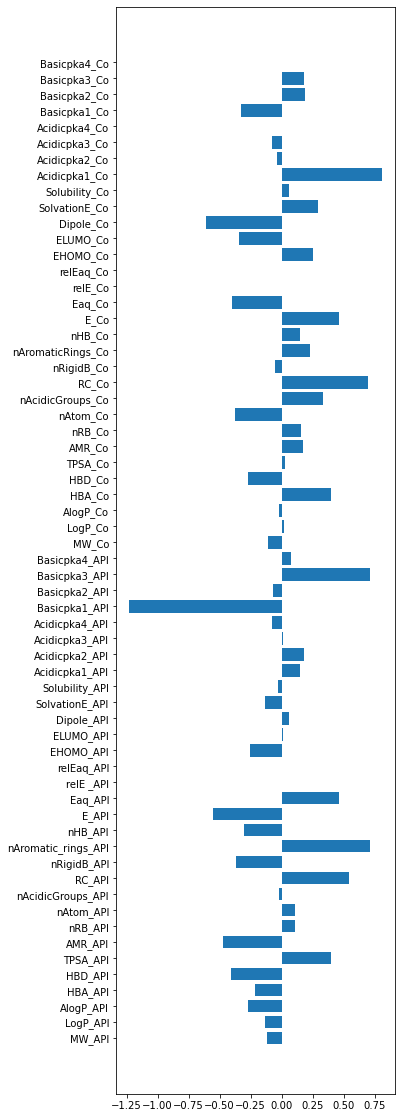

In [21]:
print(features)
print(features_values)

# Plot features and coeffficient weightings
plt.figure(figsize=(5, 20))
plt.barh(features,features_values)



#plt.savefig('Binary_Logistic_Features.png', dpi=600)

In [22]:
#ROC Curves

r_probs = [0 for _ in range(len(Y_test))]
rf_probs = Model.predict_proba(X_test)

In [23]:
rf_probs = rf_probs[:, 1]

In [24]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)

In [25]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.896


In [26]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

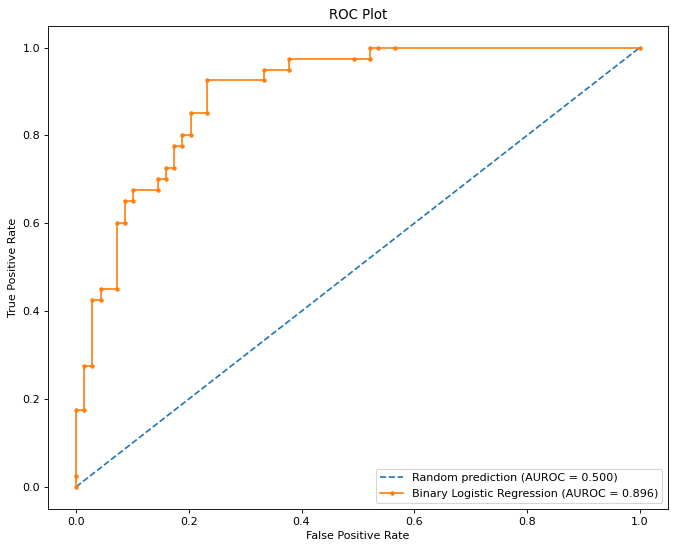

In [27]:
plt.figure(figsize=(10, 8), dpi=80)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Binary Logistic Regression (AUROC = %0.3f)' % rf_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#plt.savefig('ROC_CoCrystal_Formation_Binary_Logistic.png', dpi=600)